In [12]:
from sklearn.cluster import (KMeans ,AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram ,cut_tree)
from ISLP.cluster import compute_linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [61]:
#a
a = np.random.normal(7, 0.5, (20,50))
b = np.random.normal(9, 1, (20,50))
c = np.random.normal(4, 3, (20,50))
data = pd.DataFrame(np.concatenate([a,b,c],axis = 0))
labels = np.concatenate([np.zeros([20,1]),np.ones([20,1]),np.ones([20,1])*2],axis = 0)
data['label'] = labels
data

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,6.033951,6.636608,7.579431,6.870965,5.772087,7.800588,6.554245,6.764866,7.531127,6.628963,...,6.399831,7.099594,6.439045,7.020597,6.828326,6.702917,7.014151,7.338631,7.887728,0.0
1,7.275492,8.138995,7.100463,7.891944,7.217792,7.119895,6.915886,7.149550,7.215789,6.291274,...,7.323270,6.952286,6.047453,7.344203,7.288773,6.352678,6.416977,7.441496,7.559537,0.0
2,5.668180,7.220422,6.889677,7.037082,7.065639,6.618929,7.326335,6.655925,7.373506,7.484515,...,7.303194,7.577507,7.285639,6.922974,6.727841,7.385402,7.137657,6.569617,7.651091,0.0
3,7.131082,7.326457,6.803991,7.565358,6.207321,7.837749,6.030580,6.311689,7.125915,6.734622,...,6.306157,6.464479,6.600850,7.388838,7.303353,7.630768,7.279057,6.686264,6.901600,0.0
4,6.269289,7.314072,6.686970,7.612149,7.300148,7.969000,7.209898,7.200537,6.908741,6.807712,...,7.067775,6.947036,7.035917,6.377270,6.977297,7.379804,7.610060,6.820895,7.093977,0.0
5,7.618987,7.018764,7.359737,7.212156,6.667862,6.541933,7.529661,5.662684,6.665689,6.302350,...,6.600992,6.780735,7.212544,6.811023,6.707327,6.723396,7.239865,6.309142,6.456550,0.0
6,6.536178,6.447953,6.588183,7.448431,7.518178,7.135854,7.107406,6.665009,5.959453,7.071926,...,6.630442,7.122551,6.595616,7.913386,7.119388,6.530896,6.803685,7.379789,6.454435,0.0
7,8.360232,6.272374,7.462827,6.756695,6.595567,7.268866,6.773021,7.795776,6.299354,7.281139,...,5.951039,7.603909,6.423589,7.446687,7.646117,7.050845,6.501554,6.642418,7.314629,0.0
8,6.432258,6.709053,7.256447,6.674413,7.710391,6.480960,5.355922,6.610890,7.155062,7.431665,...,6.708748,5.717957,6.666600,7.538347,7.036405,7.039205,6.618278,7.166475,7.829329,0.0
9,7.700353,7.182934,6.573138,7.883599,7.529621,6.259578,6.121603,6.287284,6.753166,7.450891,...,7.966809,6.310525,7.186226,7.347639,7.171406,7.549473,6.683814,7.416116,7.280763,0.0


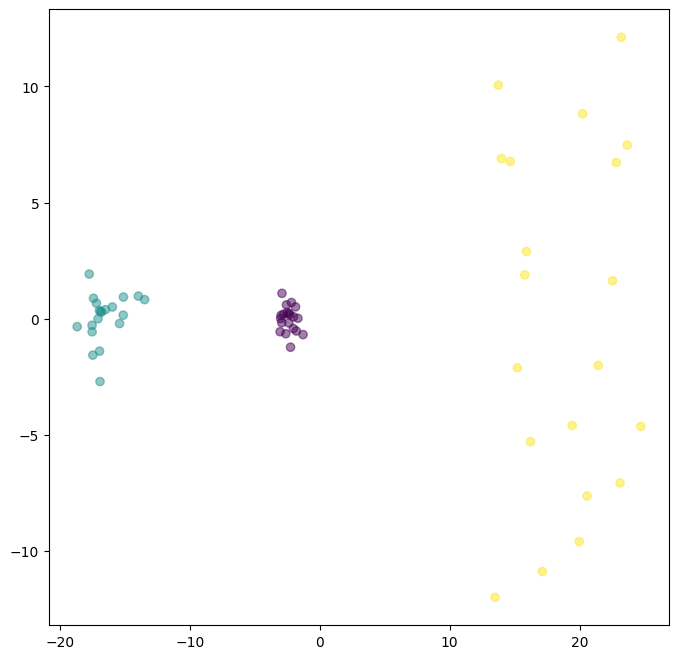

In [62]:
#b
pca = PCA(n_components=2)
pc = pca.fit_transform(data.iloc[:,0:50])
# pca.mean_


# Color vector creation
cvec = np.concatenate([np.full((20, 1), 'red'),np.full((20, 1), 'green'),np.full((20, 1), 'blue')])
                      
# Create the scatter plot
plt.figure(figsize=(8,8))
plt.scatter(pc[:,0], pc[:,1],c=labels, alpha=0.5)

# Done
plt.show()

In [94]:
#c
kmeans = KMeans(n_clusters=3,n_init = 10).fit(data.iloc[:,0:50])
pd.crosstab(pd.Series(np.squeeze(labels) , name='True'),pd.Series(kmeans.labels_ , name='K-means'))

K-means,0,1,2
True,,,
0.0,20,0,0
1.0,0,20,0
2.0,0,0,20


In [95]:
#d
kmeans = KMeans(n_clusters=2,n_init = 10).fit(data.iloc[:,0:50])
pd.crosstab(pd.Series(np.squeeze(labels) , name='True'),pd.Series(kmeans.labels_ , name='K-means'))

K-means,0,1
True,,
0.0,0,20
1.0,0,20
2.0,20,0


In [96]:
#e
kmeans = KMeans(n_clusters=4,n_init = 10).fit(data.iloc[:,0:50])
pd.crosstab(pd.Series(np.squeeze(labels) , name='True'),pd.Series(kmeans.labels_ , name='K-means'))

K-means,0,1,2,3
True,,,,
0.0,20,0,0,0
1.0,0,0,0,20
2.0,0,11,9,0


In [105]:
#e
kmeans = KMeans(n_clusters=3,n_init = 10).fit(pc)
pd.crosstab(pd.Series(np.squeeze(labels) , name='True'),pd.Series(kmeans.labels_ , name='K-means'))

K-means,0,1,2
True,,,
0.0,20,0,0
1.0,0,0,20
2.0,0,20,0


In [112]:
#f
scaler = StandardScaler()
scaled = scaler.fit_transform(data.iloc[:,0:50])

In [111]:
kmeans = KMeans(n_clusters=3,n_init = 10).fit(scaled)
pd.crosstab(pd.Series(np.squeeze(labels) , name='True'),pd.Series(kmeans.labels_ , name='K-means'))

K-means,0,1,2
True,,,
0.0,0,0,20
1.0,20,0,0
2.0,0,20,0
